In [207]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

In [208]:
#加载糖尿病diabete数据集，并将数据集拆分成特征域diabetes_X和标签域diabetes_y。

 #注意as_frame默认是False，返回numpy格式数据。此处返回pandas dataframe格式数据，便于特征过滤和数据探索。
diabetes_X, diabetes_y = datasets.load_diabetes(as_frame=True,return_X_y=True) 
#简答看下前几行数据。
print(diabetes_X.head(),'\n')
print(diabetes_y.head(),'\n')

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641   

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64 



In [209]:
#简单数据探索

#查看数据维度（例如二维数据的行列数）
print(diabetes_X.shape,'\n')
print(diabetes_y.shape,'\n')

#查看数据描述。例如样本数，各特征的均值、方差、最大值、最小值、特征缺失值数量、数值特征25%分位、50%分位和75%分位的数值大小。
print(diabetes_X.describe(),'\n')
print(diabetes_y.describe(),'\n')


(442, 10) 

(442,) 

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02

In [210]:
#查看特征列名。
diabetes_X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [211]:
#可以根据列名筛选特征。也可以重命名该列。例如将diabetes_X特征s1-s6重命名为feature1 - feature6。
##方法1-暴力重命名，此方法需要写全所有列名，否则报错。
#diabetes_X.columns = ['age', 'sex', 'bmi', 'bp', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']
#diabetes_X.columns

#方法2-rename方法，此方法只需写需要重命名的字段
diabetes_X.rename(columns={'s1':'feature1','s2':'feature2','s3':'feature3','s4':'feature4','s5':'feature5','s6':'feature6'},inplace=True)
diabetes_X.columns



Index(['age', 'sex', 'bmi', 'bp', 'feature1', 'feature2', 'feature3',
       'feature4', 'feature5', 'feature6'],
      dtype='object')

In [212]:
#划分训练集和测试集
diabetes_X_train , diabetes_X_test, diabetes_y_train , diabetes_y_test  = train_test_split(diabetes_X,diabetes_y, test_size=0.25, random_state=42) 

#验证划分后样本比例是否满足期望
print(diabetes_X_train.shape,'\n')
print(diabetes_X_test.shape,'\n')
print(diabetes_y_train.shape,'\n')
print(diabetes_y_test.shape,'\n')

(331, 10) 

(111, 10) 

(331,) 

(111,) 



In [213]:
#创建lr模型
regr = linear_model.LinearRegression()

In [214]:
#训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [215]:
#用测试集做预测，得到预测结果
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([137.94908878, 182.533354  , 129.85295373, 292.5630923 ,
       124.86788221,  89.73883143, 255.95872903, 177.64545905,
        87.8884795 , 107.93961905,  93.26357149, 171.11939483,
        56.06305218, 207.22146277,  99.78918734, 131.7128101 ,
       215.86378125, 252.18591603, 201.56577486, 220.38870357,
       204.35745939,  88.9068622 ,  68.52958146, 190.02378425,
       153.91270751, 164.02719031, 192.83227597, 187.16765226,
        46.60570802, 109.3112624 , 175.04965912,  87.8076198 ,
       130.37646375, 186.56325253, 172.4733248 , 188.61448165,
       124.07175323, 119.16132637, 147.74400127,  59.27254049,
        70.90046253, 109.30036497, 170.97191153, 156.56943489,
       168.68664924,  61.5457612 ,  71.19039454, 111.94779801,
        54.32009551, 165.81267886, 152.78043565,  63.80587155,
       110.07651605, 108.64317139, 179.16381014, 156.79651896,
        93.29011121, 212.91986757, 119.28417849,  70.70890653,
       186.678156  , 205.65720098, 140.02890626, 106.54

In [216]:
#模型评估。用预测得到的结果diabetes_y_pred和真实结果diabetes_y_test进行比较打分

#输出线性回归模型权重系数
print("Coefficients: \n", regr.coef_)


Coefficients: 
 [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]


In [217]:
#评估mae
print("Mean absolute error: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred))

Mean absolute error: 41.55


In [218]:
# 评估mse
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2848.31


In [219]:
#评估r2
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.48


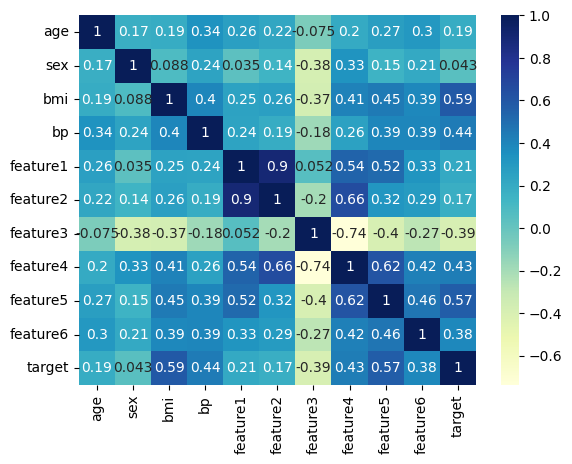

In [220]:
#进阶- 特征分析
#通过特征相关性热力图可得到特征两两间的相关性，特征较多时可筛选出头部重要特征，在效果和性能直接折中。
train_data = pd.concat([diabetes_X,diabetes_y],axis=1)
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

In [224]:
#特征筛选，此处删除特征feature3
diabetes_X_train2 = diabetes_X_train.drop(['bmi','feature5'],axis=1)
diabetes_X_test2 = diabetes_X_test.drop(['bmi','feature5'],axis=1)


diabetes_X_train2.columns

Index(['age', 'sex', 'bp', 'feature1', 'feature2', 'feature3', 'feature4',
       'feature6'],
      dtype='object')

In [225]:
#训练模型
#创建lr模型
regr2 = linear_model.LinearRegression()
regr2.fit(diabetes_X_train2, diabetes_y_train)
#用测试集做预测，得到预测结果
diabetes_y_pred = regr2.predict(diabetes_X_test2)
#输出线性回归模型权重系数
print("Coefficients: \n", regr2.coef_)
#评估mae
print("Mean absolute error: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
# 评估mse
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
#评估r2
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [  85.85463236 -339.29062144  535.89840155  648.39005052 -741.56425037
 -645.67489592  267.76426352  143.64153651]
Mean absolute error: 46.46
Mean squared error: 3469.15
Coefficient of determination: 0.37


In [223]:
#_ = sns.pairplot(diabetes_X_train, kind="reg", diag_kind="kde")